### Desafío - Dimensionalidad y Agrupación (II)

__Integrantes:__ 
- Yerko Carreño
- Javier Pilasi 
- Daniel Flores
- Francisco Fernandez
- Máximo Oliva
- Rocío Ehijo


* Para poder realizar esta actividad debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip



### Desafío 1: Preparación del ambiente de trabajo
Para este desafío trabajaremos de manera conjunta identificando la paleta de colores de carátulas
de álbumes.

* Las imágenes se encuentran en una carpeta con el nombre album_covers

* Cada imagen tiene la siguiente nomenclatura: artista-nombre-del-album.jpg .

El objetivo es generar un método que nos permita identificar la dominancia de una cantidad finita de colores.

Para importar imágenes y visualizarlas, vamos a importar las siguientes librerías:
* Comencemos por incluír las librerías clásicas: pandas , numpy y matplotlib.pyplot .
* sklearn.cluster.KMeans : para extraer los principales componentes de una matriz numérica.
* skimage.io : Para poder ingresar y leer imágenes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from skimage import io

### Desafío 2: Importación de imagenes
* Comencemos por ingresar una imágen a nuestro ambiente de trabajo. Para ello ocuparemos io.imread . ¿Qué devuelve?

* Para visualizar la imágen en el notebook, ocupe io.imshow .

In [2]:
img1 = io.imread('backstreet-boys-millenium.jpg')

In [3]:
type(img1)

numpy.ndarray

In [4]:
img1

array([[[156, 188, 203],
        [174, 210, 224],
        [192, 232, 244],
        ...,
        [194, 231, 237],
        [194, 231, 237],
        [194, 231, 237]],

       [[153, 185, 200],
        [171, 207, 221],
        [190, 230, 242],
        ...,
        [191, 228, 234],
        [193, 230, 236],
        [194, 231, 237]],

       [[150, 183, 200],
        [170, 206, 220],
        [188, 230, 242],
        ...,
        [190, 227, 235],
        [193, 230, 238],
        [196, 233, 241]],

       ...,

       [[152, 213, 198],
        [140, 200, 188],
        [141, 203, 192],
        ...,
        [164, 215, 218],
        [162, 210, 214],
        [170, 215, 220]],

       [[152, 207, 201],
        [140, 197, 190],
        [141, 201, 193],
        ...,
        [160, 211, 214],
        [159, 207, 211],
        [170, 215, 220]],

       [[158, 210, 208],
        [146, 198, 196],
        [148, 203, 200],
        ...,
        [165, 216, 219],
        [169, 217, 221],
        [182, 227, 232]]

El método devuelve un array (matriz)

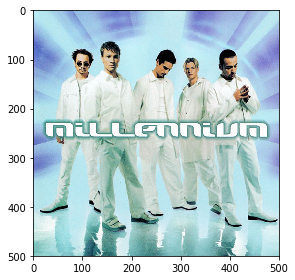

In [5]:
io.imshow(img1)

### Desafío 3: Preprocesamiento de imágenes y KMeans
* Con la representación numérica de la imágen, vamos a extraer la altura, el ancho y la cantidad de canales (RGB) mediante shape .
* Posteriormente redimensionaremos la imágen con reshape. 
    (Tips: reshape(heigth * width , rgb))
    
* Partamos por inicializar nuestro algoritmo KMeans con un k=8 , ¿Qué significará esto?
* Vuelva a implementar el mismo algoritmo con MiniBatchKMeans . ¿Qué diferencia existe con KMeans ?

In [6]:
img1.shape

(500, 500, 3)

In [7]:
img_rs = img1.reshape(500*500, 3)

In [8]:
img_rs.shape

(250000, 3)

In [9]:
img_rs

array([[156, 188, 203],
       [174, 210, 224],
       [192, 232, 244],
       ...,
       [165, 216, 219],
       [169, 217, 221],
       [182, 227, 232]], dtype=uint8)

In [10]:
# instanciamos KMeans en un nuevo objeto
kmeans = KMeans(n_clusters=8, random_state=17072019)
# obtenemos los resultados
km_fit_results = kmeans.fit_predict(img_rs)

Al usar un k=8 definimos a priori el número de clusters del modelo.

In [11]:
mb_kMeans = MiniBatchKMeans(n_clusters=8, random_state=17072019)
mbkm_fit_results = kmeans.fit_predict(img_rs)

MiniBatchKMeans difiere de KMeans en el algoritmo utilizado para la convergencia, utiliza ejemplos aleatorios en cada iteración lo que hace computacionalmente menos costoso, por un pequeño sacrificio de calidad.         

### Desafío 4: Extracción de valores
* Ahora extraeremos las etiquetas predichas con labels_ . Hasta el momento las etiquetas hacen referencia a cada centroide. Para imputar sentido en éstos, debemos extraer los valores de los centroides.
* Para extraer los centroides (valores característicos), utilicemos el atributo cluster_centers_ .
* Con las etiquetas, generaremos un conteo de ocurrencia con np.unique . Para extraer el conteo, debemos implementar la opción return_counts=True .

In [12]:
kmeans.labels_

array([5, 5, 3, ..., 5, 5, 3])

In [13]:
pd.Series(kmeans.labels_).value_counts()

3    67869
5    41301
0    41049
4    33497
1    30839
6    15436
7    14316
2     5693
dtype: int64

In [14]:
centroids = kmeans.cluster_centers_
centroids

array([[197.66812014, 210.23553628, 201.51608974],
       [143.63074526, 180.93031031, 169.08822384],
       [ 20.40917077,  23.66163036,  26.06939564],
       [188.36398326, 229.51212541, 238.37248431],
       [233.91682329, 240.67788419, 238.75130523],
       [159.38995765, 197.26913491, 223.52936479],
       [ 91.96523093, 134.25739491, 125.16898028],
       [128.84442892, 146.74250786, 210.1563395 ]])

In [15]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([41049, 30839,  5693, 67869, 33497, 41301, 15436, 14316],
       dtype=int64))

### Desafío 5: Conversión rgb a hex

* Con los centroides, vamos a convertirlos a formato hexadecimal. Vamos a generar una función y la pasaremos con map por cada centroide.

In [16]:
def rgb_hex_it(rgb):
   tmp = list(map(lambda x: int(x), rgb))
   return'#%02x%02x%02x' % (tmp[0], tmp[1], tmp[2])

In [17]:
print(rgb_hex_it([197.66812014, 210.23553628, 201.51608974]))

#c5d2c9


In [18]:
colors_centros =  list(map(lambda x: rgb_hex_it(x), centroids ))

### Desafío 6: Definición de base
Ahora generaremos un DataFrame con las siguientes variables:
* El color hex .
* La ocurrencia del color en cada pixel count .
* El porcentaje de ocurrencia de cada color respecto a cluster_centers_ .

Posteriormente ordenaremos los colores de forma descendente por el porcentaje de ocurrencia.

In [19]:
colors_centros

['#c5d2c9',
 '#8fb4a9',
 '#14171a',
 '#bce5ee',
 '#e9f0ee',
 '#9fc5df',
 '#5b867d',
 '#8092d2']

In [20]:
frec = list(np.unique(kmeans.labels_, return_counts=True)[1])
frec

[41049, 30839, 5693, 67869, 33497, 41301, 15436, 14316]

In [21]:
porcent = list(map(lambda x: round(x/sum(frec), 2),frec))
porcent

[0.16, 0.12, 0.02, 0.27, 0.13, 0.17, 0.06, 0.06]

In [22]:
dicc={'color_hex':colors_centros, 'color_freq':frec, 'color_porc':porcent}
dfc=pd.DataFrame(data=dicc).sort_values(by='color_porc', ascending=False)

In [23]:
dfc.head(10)

,color_hex,color_freq,color_porc
3,#bce5ee,67869,0.27
5,#9fc5df,41301,0.17
0,#c5d2c9,41049,0.16
4,#e9f0ee,33497,0.13
1,#8fb4a9,30839,0.12
6,#5b867d,15436,0.06
7,#8092d2,14316,0.06
2,#14171a,5693,0.02


### Desafío 7: Visualización

Genere un gráfico de barras donde presente el porcentaje de cada color. Las barras deben estar
coloreadas con el color inferido.

<function matplotlib.pyplot.show(*args, **kw)>

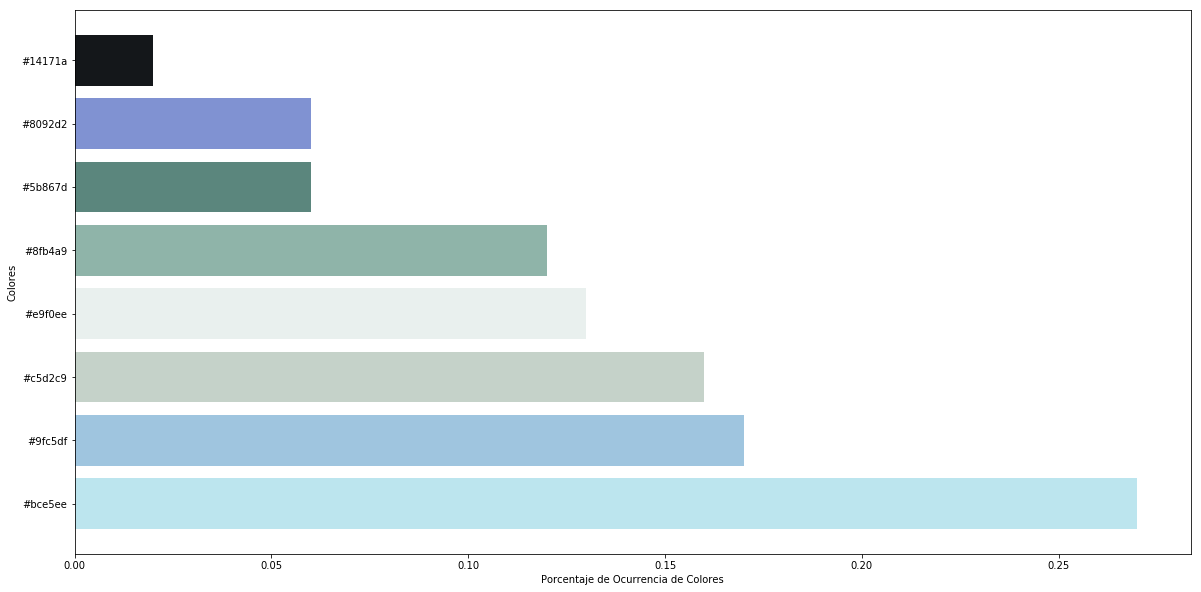

In [24]:
plt.figure(figsize=(20,10))
plt.barh(dfc['color_hex'], dfc['color_porc'], color= dfc['color_hex'])
plt.xlabel('Porcentaje de Ocurrencia de Colores')
plt.ylabel('Colores')
plt.show